In [11]:
import matplotlib.pyplot as plt

In [ ]:
import base64
from anthropic import Anthropic
from IPython.display import Image

client = Anthropic(api_key=')
MODEL_NAME = "claude-3-5-sonnet-latest"

def get_base64_encoded_image(image_path):
    with open(image_path, "rb") as image_file:
        binary_data = image_file.read()
        base_64_encoded_data = base64.b64encode(binary_data)
        base64_string = base_64_encoded_data.decode('utf-8')
        return base64_string

In [37]:
im1 = "data/images/t1.png"
im2 = "data/images/t2.png"
im3 = "data/images/t3.png"

im4 = "data/images/s1.png"
im5 = "data/images/s2.png"
im6 = "data/images/s3.png"

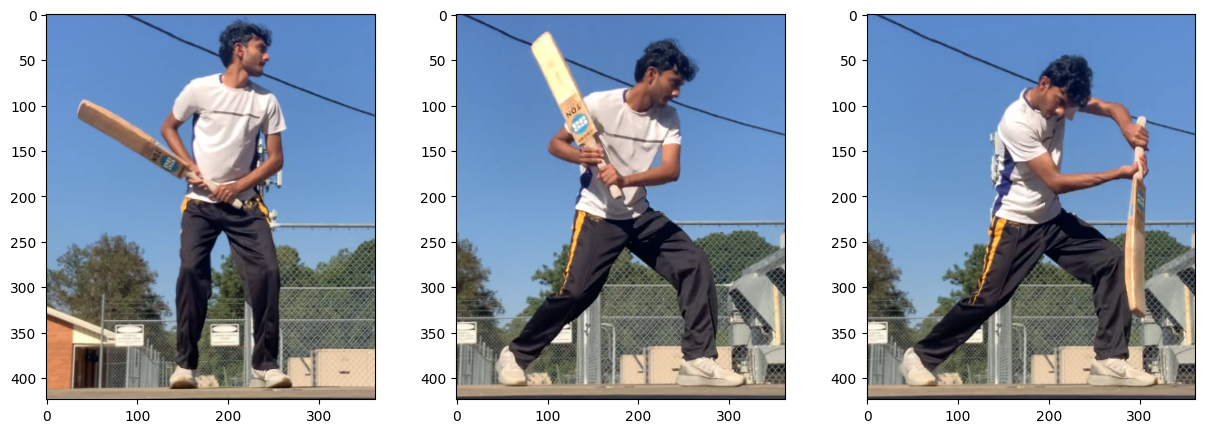

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(plt.imread(im1))
ax[1].imshow(plt.imread(im2))
ax[2].imshow(plt.imread(im3))
plt.show()

In [35]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": get_base64_encoded_image(im1)}},
            {"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": get_base64_encoded_image(im2)}},
            {"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": get_base64_encoded_image(im3)}},
            {"type": "text", "text": """ 
             You are given three frames from a video of a person hitting a cricket shot. 
             How is their stance(good/bad), weight transfer(good/bad) and overall shot quality(good/bad)? 
             Only focus on their technique. 
            """}
        ]
    }
]

In [36]:
response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=256,
    messages=message_list
)
print(response.content[0].text)

Let's analyze the cricket batting technique shown in these three frames:

Stance:
- The stance appears quite casual and not entirely orthodox
- The batter seems to be standing too upright without proper knee bend
- Body positioning is not ideal for a proper cricket shot
Rating: Below average/Poor

Weight Transfer:
- The weight transfer sequence is not fluid
- In the second frame, there's an attempt to shift weight but the body position remains too high
- The back foot positioning suggests inadequate grounding for proper balance
- Front foot movement is minimal
Rating: Poor

Overall Shot Quality:
- The technique appears more casual/recreational than proper cricket batting
- The high body position throughout the shot limits power generation
- Bat swing path is not ideal - seems more baseball-influenced
- Lack of proper forward stride or back foot pivot
- Arms are not fully extended through the shot
Rating: Below average

Recommendations for improvement:
1. Lower the stance with bent knee

In [49]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "text", "text": """Here are three frames of a person hitting a cricket shot."""},
            {"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": get_base64_encoded_image(im1)}},
            {"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": get_base64_encoded_image(im2)}},
            {"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": get_base64_encoded_image(im3)}},
            
    #     ],
    # },
    # {
    #     "role": 'assistant',
    #     "content":[
    #         {"type": "text", "text": "The stance is good, feet are shoulder width apart with knees slightly bent. Weight transfer from backfoot to frontfoot is also good. Overall shot quality is good."},
    #     ],
    # },
    # {
        # "role": 'user',
        # "content": [
            {"type": "text", "text": """Here are three more frames. Taking the earlier video as reference, commend on this person's stance, weight transfer and overall shot quality."""},
            {"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": get_base64_encoded_image(im4)}},
            {"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": get_base64_encoded_image(im5)}},
            {"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": get_base64_encoded_image(im6)}},
            
        ],
    },
    
]

In [50]:
response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=256,
    messages=message_list
)
print(response.content[0].text)

Looking at both sets of images, I can make some observations about the cricket batting technique:

First Set (White T-shirt):
- Good balanced initial stance
- Proper weight transfer from back foot to front foot
- The bat swing is fluid and follows through well
- The head position remains steady throughout the shot

Second Set (Black Hoodie):
- The initial stance appears less structured and balanced
- Weight transfer is less pronounced and somewhat restricted
- The footwork seems casual (wearing flip-flops doesn't help)
- The follow-through appears more limited and less controlled

Key Differences:
1. The first set shows better cricket fundamentals with proper weight distribution and transfer
2. The batting grip and stance in the first set is more orthodox and technically sound
3. The second set appears more casual and less focused on proper technique
4. Body positioning and balance are notably better in the first set

For improvement in the second set, focus should be on:
- Maintaining